# Investigation of the numpy.random package

In [1]:
import numpy as np
import matplotlib.pyplot as pl
from scipy.stats import binom
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" ## Ref [] to display all called variables in a cell

## Problem 1: Overall package purpose

Random number generators (RNG) in computing are used to generate pseudonrandom numbers for use in things like statistical sampling, cryptography and procedural generation.

"True" random numbers stem from analysis of an entropic systems such as, in the case of a computer, fan heat or the timing of keyboard pressing  [ref], which are considered disordered and unpredictable. This is in contrast with the pseudorandom numbers generated by algorithms, such as the one used in the numpy.random package. This package produces a sequence of seemingly random numbers which are in reality predetermined by a defining attribute known as a key, or seed, upon initialisation.



In [2]:
5 * np.random.random_sample((3, 2)) - 5

array([[-2.0651985 , -3.93493817],
       [-2.39010226, -3.22517152],
       [-4.46974099, -3.98777135]])

## Problem 2: Simple Random Data and Permutations

### numpy.random.rand

Random values in the interval [0, 1)

(array([121., 102.,  92.,  98., 105.,  83.,  97., 105.,  94., 103.]),
 array([5.30828607e-04, 1.00425551e-01, 2.00320273e-01, 3.00214995e-01,
        4.00109717e-01, 5.00004439e-01, 5.99899161e-01, 6.99793883e-01,
        7.99688605e-01, 8.99583328e-01, 9.99478050e-01]),
 <a list of 10 Patch objects>)

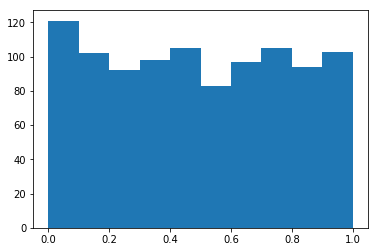

In [3]:
x = np.random.rand(1000)
pl.hist(x)

### numpy.random.randn¶

Random sample of normal/Gaussian distribution

In [4]:
np.random.randn()

1.715640861218824

In [5]:
2.5 * np.random.randn(2, 4) + 3

array([[3.52920576, 0.98310319, 1.92031057, 0.70485524],
       [3.5329312 , 3.64732194, 4.23837687, 7.05914064]])

### numpy.random.randint
Random integers

In [6]:
np.random.randint(2, size=10)

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0])

In [7]:
np.random.randint(1, size=10)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
th = np.random.randint(0, 20, size=(10))
th

array([ 3, 12,  7,  1, 12,  7,  2, 14,  7,  1])

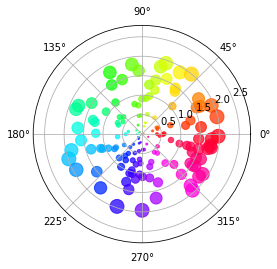

In [9]:
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 50 * r**2
colors = theta

fig = pl.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)

### Permutation

Permutations are arrangements of a set of values in a certain sequence or pattern, without repeating e.g a deck of cards.

In [10]:
np.random.permutation(10)
np.random.permutation([1, 4, 9, 12, 15])
arr = np.arange(9).reshape((3, 3))
np.random.permutation(arr)


array([8, 7, 6, 5, 9, 3, 1, 2, 0, 4])

array([ 4, 12,  1,  9, 15])

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

## Problem 3: Distributions

### Pareto

The 80-20 rule (sociology, economics etc.)

C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


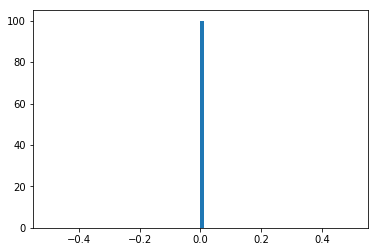

In [15]:
a, m = 3., 0.  # shape and mode
s = (np.random.pareto(a, 1000) + 1) * m
count, bins, _ = pl.hist(s, 100, density=True)
fit = a*m**a / bins**(a+1)
pl.plot(bins, max(count)*fit/max(fit), linewidth=2, color='r')
pl.show()

### Laplace
Laplace transforms for signals

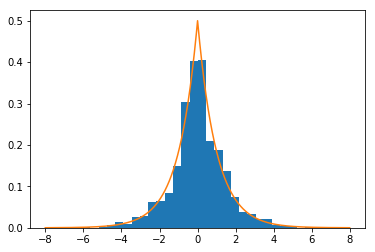

In [12]:
loc, scale = 0., 1.
s = np.random.laplace(loc, scale, 1000)
count, bins, ignored = pl.hist(s, 30, density=True)
x = np.arange(-8., 8., .01)
pdf = np.exp(-abs(x-loc)/scale)/(2.*scale)
pl.plot(x, pdf)

### Binomial 

Probability of events with only two outcomes, yes or no e.g. flipping a coin

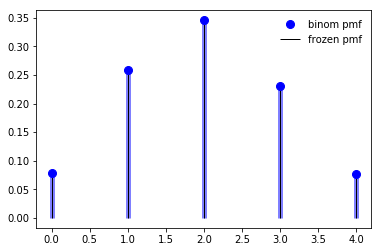

In [13]:
fig, ax = pl.subplots(1, 1)
n, p = 5, 0.4
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
rv = binom(n, p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
        label='frozen pmf')
ax.legend(loc='best', frameon=False)
pl.show()

### Poisson

Probability of events occuring if a constant rate is known and is independent of previous event e.g. phone calls, website crashes [ref]

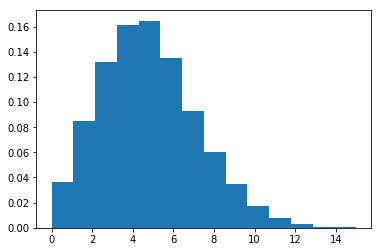

In [18]:
s = np.random.poisson(5, 10000)
count, bins, ignored = pl.hist(s, 14, density=True)
x = np.arange(0., 16., .01)
pl.show()

### Normal / Gaussian

A.K.A. the Bell Curve

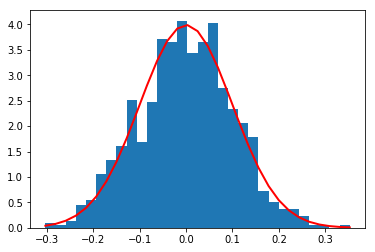

In [20]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = pl.hist(s, 30, density=True)
pl.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
pl.show()

## Problem 4: Seeds

Seeds are an attribute of random number generators decided at the time of import/initialisation. They determine the pattern which the "random" numbers will materialise. If the generator is initialized with the same seed in multiple instances, it will produce the same sequence of numbers each time, in adherence with various probability distributions. This is demonstrated below with the numpy.random.seed function used to set the seed.

In [ ]:
x1 = np.random.randn(3, 3)
y1 = np.random.randn(3, 3)
x1
y1

In [ ]:
np.random.seed(12)
x2 = np.random.randn(3, 3)
np.random.seed(12)
y2 = np.random.randn(3, 3)
x2
y2

The function numpy.random.randomstate can take a seed as a parameter. 

In [ ]:
state = np.random.RandomState(12)
state.randn(3, 3)
state = np.random.RandomState(12)
state.randn(3, 3)
state.randn(3, 3)

# References

https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs

https://www.howtogeek.com/183051/htg-explains-how-computers-generate-random-numbers/ - randomness/entropy etc.

https://towardsdatascience.com/the-poisson-distribution-and-poisson-process-explained-4e2cb17d459